\newpage

For all the questions, use Python 3.11.5 and virtual environment. Then, install the required libraries for text mining and Shiny visualization. 

## Question 1: Word Cloud Analysis

Let's explore the article **"Data Science and Engineering With Human in the Loop, Behind the Loop, and Above the Loop"** by Xiao-Li Meng (2023). Follow the steps below to create and analyze a word cloud for pages 2–5 of the article. 

(1) Add the article **"Data Science and Engineering With Human in the Loop, Behind the Loop, and Above the Loop"** by Xiao-Li Meng (2023) to your reference list.

## References

  Meng, X.-L. (2023). Data Science and Engineering With Human in the Loop, Behind the Loop, and Above the Loop. Harvard Data Science Review, 5(2). https://doi.org/10.1162/99608f92.68a012eb

\newpage

(2) Download the PDF of the article. 

    \color{blue}

    Hint: 

    - Access the article via [https://doi.org/10.1162/99608f92.68a012eb](https://doi.org/10.1162/99608f92.68a012eb).  
    - Click the **Download** button in the top-right corner, and choose the **PDF** format.  
    - Move the downloaded file to your working folder and rename it as `paper.pdf`.

    \color{black}

\newpage

(3) Use `pdfplumber.open()` to open the PDF.

In [1]:
import numpy as numpy
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import pytz

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import pdfplumber

In [2]:
# this NLTK data download is called only one time
# word_tokenize uses punkt tokenizer model
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jaspreetbrar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jaspreetbrar/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
with pdfplumber.open("/Users/jaspreetbrar/Desktop/Classes/Stats3DA3/Assignment2/paper.pdf") as pdf:
    # Extract text from pages 1 to 9
    text = ""
    for i in range(1, 9):
        page = pdf.pages[i]
        text += page.extract_text()
    print(text)

Harvard Data Science Review • Issue 5.2, Spring 2023 Data Science and Engineering With Human in the Loop, Behind the
Loop, and Above the Loop
The term human-in-the-loop (HITL) generally refers to the need for human interaction, intervention, and
judgment to control or change the outcome of a process, and it is a practice that is being increasingly
emphasized in machine learning, generative AI, and the like. For readers who have not enjoyed machine-
assisted learning or who are comfortable with their human intelligences, it would not surprise me if some of
you would wonder, upon hearing the term HITL, ‘Wait, when did we take humans out of the loop?’ The
diversity of human minds guarantees that such a question would generate reactions ranging from being inspired
to being despised. Regardless, however, the arrival of ChatGPT and other AI chatbots has made the mostly
academic debate of machine intelligence versus human intelligence into a household conversation piece. It is
therefore an ap

\newpage

(4) Extract the text from pages 2 to 5.

In [4]:
with pdfplumber.open("/Users/jaspreetbrar/Desktop/Classes/Stats3DA3/Assignment2/paper.pdf") as pdf:
    # Extract text from pages 2 to 5
    text = ""
    for i in range(1, 5):
        page = pdf.pages[i]
        text += page.extract_text()
    print(text)

Harvard Data Science Review • Issue 5.2, Spring 2023 Data Science and Engineering With Human in the Loop, Behind the
Loop, and Above the Loop
The term human-in-the-loop (HITL) generally refers to the need for human interaction, intervention, and
judgment to control or change the outcome of a process, and it is a practice that is being increasingly
emphasized in machine learning, generative AI, and the like. For readers who have not enjoyed machine-
assisted learning or who are comfortable with their human intelligences, it would not surprise me if some of
you would wonder, upon hearing the term HITL, ‘Wait, when did we take humans out of the loop?’ The
diversity of human minds guarantees that such a question would generate reactions ranging from being inspired
to being despised. Regardless, however, the arrival of ChatGPT and other AI chatbots has made the mostly
academic debate of machine intelligence versus human intelligence into a household conversation piece. It is
therefore an ap

\newpage

(5) Combine the text from these pages into a single string. 

In [5]:
# Combine the text from pages 2 to 5 into a single string
combined_text = text.replace('\n', ' ')
print(combined_text)

Harvard Data Science Review • Issue 5.2, Spring 2023 Data Science and Engineering With Human in the Loop, Behind the Loop, and Above the Loop The term human-in-the-loop (HITL) generally refers to the need for human interaction, intervention, and judgment to control or change the outcome of a process, and it is a practice that is being increasingly emphasized in machine learning, generative AI, and the like. For readers who have not enjoyed machine- assisted learning or who are comfortable with their human intelligences, it would not surprise me if some of you would wonder, upon hearing the term HITL, ‘Wait, when did we take humans out of the loop?’ The diversity of human minds guarantees that such a question would generate reactions ranging from being inspired to being despised. Regardless, however, the arrival of ChatGPT and other AI chatbots has made the mostly academic debate of machine intelligence versus human intelligence into a household conversation piece. It is therefore an ap

\newpage

(6) Split the string by lines using `\n`.

In [6]:
lines = combined_text.split('\n')
print(lines)

['Harvard Data Science Review • Issue 5.2, Spring 2023 Data Science and Engineering With Human in the Loop, Behind the Loop, and Above the Loop The term human-in-the-loop (HITL) generally refers to the need for human interaction, intervention, and judgment to control or change the outcome of a process, and it is a practice that is being increasingly emphasized in machine learning, generative AI, and the like. For readers who have not enjoyed machine- assisted learning or who are comfortable with their human intelligences, it would not surprise me if some of you would wonder, upon hearing the term HITL, ‘Wait, when did we take humans out of the loop?’ The diversity of human minds guarantees that such a question would generate reactions ranging from being inspired to being despised. Regardless, however, the arrival of ChatGPT and other AI chatbots has made the mostly academic debate of machine intelligence versus human intelligence into a household conversation piece. It is therefore an 

\newpage

(7) Create a pandas data frame named `df` with a column labeled `line` containing the split lines.

In [7]:
df = pd.DataFrame({'line': lines})
print(df)

                                                line
0  Harvard Data Science Review • Issue 5.2, Sprin...


\newpage

(8) Break each line into individual words.

In [8]:
df['words'] = df['line'].apply(lambda x: re.findall(r'\b\w+\b', x.lower()))
df = df.explode('words')
print(df)

                                                 line       words
0   Harvard Data Science Review • Issue 5.2, Sprin...     harvard
0   Harvard Data Science Review • Issue 5.2, Sprin...        data
0   Harvard Data Science Review • Issue 5.2, Sprin...     science
0   Harvard Data Science Review • Issue 5.2, Sprin...      review
0   Harvard Data Science Review • Issue 5.2, Sprin...       issue
..                                                ...         ...
0   Harvard Data Science Review • Issue 5.2, Sprin...  efficiency
0   Harvard Data Science Review • Issue 5.2, Sprin...         the
0   Harvard Data Science Review • Issue 5.2, Sprin...      answer
0   Harvard Data Science Review • Issue 5.2, Sprin...          he
0   Harvard Data Science Review • Issue 5.2, Sprin...           5

[2366 rows x 2 columns]


\newpage

(9) Convert each word into a separate row in the data frame.

In [9]:
df = df.explode('words')
print(df)

                                                 line       words
0   Harvard Data Science Review • Issue 5.2, Sprin...     harvard
0   Harvard Data Science Review • Issue 5.2, Sprin...        data
0   Harvard Data Science Review • Issue 5.2, Sprin...     science
0   Harvard Data Science Review • Issue 5.2, Sprin...      review
0   Harvard Data Science Review • Issue 5.2, Sprin...       issue
..                                                ...         ...
0   Harvard Data Science Review • Issue 5.2, Sprin...  efficiency
0   Harvard Data Science Review • Issue 5.2, Sprin...         the
0   Harvard Data Science Review • Issue 5.2, Sprin...      answer
0   Harvard Data Science Review • Issue 5.2, Sprin...          he
0   Harvard Data Science Review • Issue 5.2, Sprin...           5

[2366 rows x 2 columns]


\newpage

(10) Convert all words to lowercase.

In [10]:
df['words'] = df['words'].str.lower()
print(df)

                                                 line       words
0   Harvard Data Science Review • Issue 5.2, Sprin...     harvard
0   Harvard Data Science Review • Issue 5.2, Sprin...        data
0   Harvard Data Science Review • Issue 5.2, Sprin...     science
0   Harvard Data Science Review • Issue 5.2, Sprin...      review
0   Harvard Data Science Review • Issue 5.2, Sprin...       issue
..                                                ...         ...
0   Harvard Data Science Review • Issue 5.2, Sprin...  efficiency
0   Harvard Data Science Review • Issue 5.2, Sprin...         the
0   Harvard Data Science Review • Issue 5.2, Sprin...      answer
0   Harvard Data Science Review • Issue 5.2, Sprin...          he
0   Harvard Data Science Review • Issue 5.2, Sprin...           5

[2366 rows x 2 columns]


\newpage

(11) Remove stop words.

In [11]:
# Define the stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from the 'words' column
df = df[~df['words'].isin(stop_words)]
print(df)

                                                 line       words
0   Harvard Data Science Review • Issue 5.2, Sprin...     harvard
0   Harvard Data Science Review • Issue 5.2, Sprin...        data
0   Harvard Data Science Review • Issue 5.2, Sprin...     science
0   Harvard Data Science Review • Issue 5.2, Sprin...      review
0   Harvard Data Science Review • Issue 5.2, Sprin...       issue
..                                                ...         ...
0   Harvard Data Science Review • Issue 5.2, Sprin...  personally
0   Harvard Data Science Review • Issue 5.2, Sprin...         yet
0   Harvard Data Science Review • Issue 5.2, Sprin...  efficiency
0   Harvard Data Science Review • Issue 5.2, Sprin...      answer
0   Harvard Data Science Review • Issue 5.2, Sprin...           5

[1369 rows x 2 columns]


\newpage

(12) Remove unsuitable words using the following steps:  

\color{blue}

Hint:

(i) Remove rows where the `word` column contains punctuation using
    - `str.contains(r'[,.•‘”“:’;\(\)\[\]]', regex=True)]`
(ii) Remove rows where the `word` column contains numbers using:
    - `str.contains(r'\d', regex=True)]`
(iii) Remove rows where the `word` column contains single letters using:
    - `str.contains(r'^[a-z]$', regex=True)]`

\color{black}

In [12]:
# Remove rows where the 'words' column contains punctuation
df = df[~df['words'].str.contains(r'[,.•‘”“:’;\(\)\[\]]', regex=True)]

# Remove rows where the 'words' column contains numbers
df = df[~df['words'].str.contains(r'\d', regex=True)]

# Remove rows where the 'words' column contains single letters
df = df[~df['words'].str.contains(r'^[a-z]$', regex=True)]

print(df)

                                                 line       words
0   Harvard Data Science Review • Issue 5.2, Sprin...     harvard
0   Harvard Data Science Review • Issue 5.2, Sprin...        data
0   Harvard Data Science Review • Issue 5.2, Sprin...     science
0   Harvard Data Science Review • Issue 5.2, Sprin...      review
0   Harvard Data Science Review • Issue 5.2, Sprin...       issue
..                                                ...         ...
0   Harvard Data Science Review • Issue 5.2, Sprin...    articles
0   Harvard Data Science Review • Issue 5.2, Sprin...  personally
0   Harvard Data Science Review • Issue 5.2, Sprin...         yet
0   Harvard Data Science Review • Issue 5.2, Sprin...  efficiency
0   Harvard Data Science Review • Issue 5.2, Sprin...      answer

[1302 rows x 2 columns]


\newpage

(13) Create a term-frequency data frame. 

\color{blue}
    
    Hint: 
  
(i) Calculate the frequency of each unique word using: `value_counts().reset_index()`
(ii) Save the result in a DataFrame called `freq`.

\color{black}

In [13]:
# Calculate the frequency of each unique word
freq = df['words'].value_counts().reset_index()

# Rename the columns for better readability
freq.columns = ['word', 'frequency']

print(freq)

            word  frequency
0           data         44
1        science         38
2          human         20
3           loop         19
4    engineering         14
..           ...        ...
783        image          1
784    treasures          1
785      mission          1
786    education          1
787       answer          1

[788 rows x 2 columns]


\newpage

(14) Generate a word cloud for the most frequently occurring words (e.g., the top 10 words).

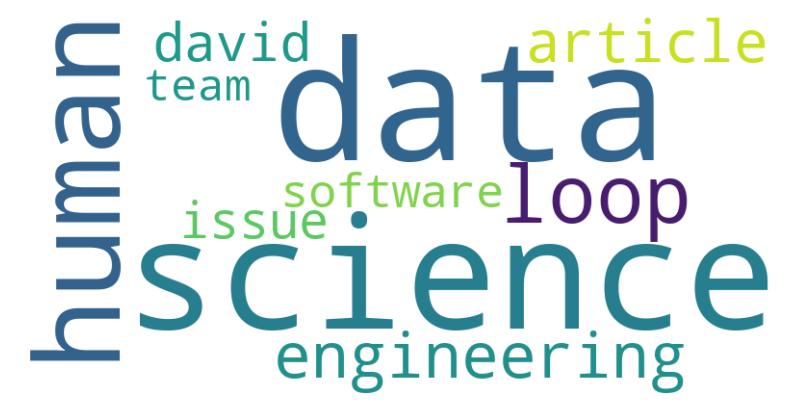

In [14]:
# Generate a word cloud for the top 10 most frequently occurring words
top_words = freq.head(10)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(top_words['word'], top_words['frequency'])))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

\newpage

(15) Write a summary paragraph (at least two statements) about your word cloud. The summary can include any limitations of your analysis and provide context based on the chosen text.

The word cloud generated shown that data science is the most prevalent word in the PDF as it is the largest. The second most common words found in the PDF is loop and human.

\newpage

## Question 2

Greenhouse gases (GHGs) play a significant role in global warming by capturing and retaining solar heat energy, leading to elevated global temperatures. In 2004, Canada launched the Greenhouse Gas Reporting Program (GHGRP) to monitor and record emissions from facilities that release 10 kilotonnes or more of greenhouse gases, measured in CO2-equivalent units. Facilities meeting this threshold are required to submit annual reports to Environment and Climate Change Canada. The dataset is publicly accessible through Canada’s Open Government Portal: [\color{blue} Greenhouse Gas Reporting Program (GHGRP) - Facility Greenhouse Gas (GHG) Data\color{black}](https://open.canada.ca/data/en/dataset/a8ba14b7-7f23-462a-bdbb-83b0ef629823).

For Question 2, we have downloaded the dataset [\color{blue} PDGES-GHGRP-GHGEmissionsGES-2004-Present.csv \color{black}](https://data-donnees.az.ec.gc.ca/data/substances/monitor/greenhouse-gas-reporting-program-ghgrp-facility-greenhouse-gas-ghg-data/PDGES-GHGRP-GHGEmissionsGES-2004-Present.csv) from the portal. 

This analysis focuses on creating a Shiny App to explore trends in greenhouse gas emissions across Canada’s provinces and territories, measured in CO2-equivalent units.


### Data dictionary: 

The dataset, spanning from 2004 to the present, includes emissions data (in tonnes and CO2-equivalent tonnes) for each facility, categorized by gas type, including carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), and sulphur hexafluoride (SF6). It also provides the province or territory where each facility is located. For further details, refer to the [\color{blue} Greenhouse Gas Reporting Program (GHGRP) - Facility Greenhouse Gas (GHG) Data\color{black}](https://open.canada.ca/data/en/dataset/a8ba14b7-7f23-462a-bdbb-83b0ef629823).

### Pre-Processing Steps

To simplify the task of creating a Shiny App, we have pre-processed the data as follows:

We start by importing the necessary libraries for data transformation:

In [15]:
#| eval: false
import numpy as np
import pandas as pd
import re

Next, we read the downloaded dataset in CSV format with the specified encoding (latin1):

In [16]:
#| eval: false
df = pd.read_csv("/Users/jaspreetbrar/Desktop/Classes/Stats3DA3/Assignment2/PDGES-GHGRP-GHGEmissionsGES-2004-Present.csv", encoding='latin1') 


The column names in the dataset are a mix of English and French. We use the `clean_column_names()` function to standardize the column names by removing French names, non-ASCII characters, and unnecessary symbols.

Here is the `clean_column_names()` function:

In [17]:
#| eval: false

# clean_column_names function
def clean_column_names(column_names):
    cleaned_names = []
    # loop through each column name
    for name in column_names:
        # convert names to ASCII and remove non-ASCII characters
        name = name.encode('ascii', 'ignore').decode('ascii')
        # remove everything after '/' (French column name)
        name = re.sub(r'/.*', '', name)
        # remove parentheses
        name = re.sub(r'[()]', '', name)
        # remove extra whitespace
        name = ' '.join(name.split())
        cleaned_names.append(name)
        # return new column names
    return cleaned_names 



We then apply this function to clean the column names in the DataFrame:

In [18]:
#| eval: false
df.columns = clean_column_names(df.columns)


Next, we select the relevant columns for the analysis:

- `Reference Year` - the year GHG gas emission was recorded.
- `GHGRP ID No.` - the facility identity.
- `Facility Province or Territory` - province or territory of the facility.
- `CO2 tonnes` - emissions (in tonnes and tonnes of CO2 eq.) of carbon dioxide (CO2).
- `CH4 tonnes` - emissions (in tonnes and tonnes of CO2 eq.) of methane.
- `N2O tonnes` - emissions (in tonnes and tonnes of CO2 eq.) of nitrous oxide.
- `SF6 tonnes`- emissions (in tonnes and tonnes of CO2 eq.) of sulphur hexafluoride.
- `HFC Total tonnes CO2e` - emissions (in tonnes and tonnes of CO2 eq.) of hydrofluorocarbons.
- `PFC Total tonnes CO2e` - emissions (in tonnes and tonnes of CO2 eq.) of perfluorocarbons.


In [19]:
#| eval: false

selected_cols = [
    "Reference Year", "GHGRP ID No.", "Facility Province or Territory",
    "CO2 tonnes", "CH4 tonnes", "N2O tonnes", "SF6 tonnes",
    "HFC Total tonnes CO2e", "PFC Total tonnes CO2e"
]

df= df[selected_cols]

We rename the columns to make them more concise and consistent:

In [20]:
#| eval: false

df.rename(columns={
    "Reference Year": "Year",
    "GHGRP ID No.": "Facility_ID",
    "Facility Province or Territory": "Province_Territory",
    "CO2 tonnes": "CO2",
    "CH4 tonnes": "CH4",
    "N2O tonnes": "N2O",
    "SF6 tonnes": "SF6",
    "HFC Total tonnes CO2e": "HFC",
    "PFC Total tonnes CO2e": "PFC"
}, inplace=True)

print(df.head())

   Year Facility_ID Province_Territory           CO2          CH4        N2O  \
0  2022      G12721             Quebec  2.473800e+02   956.162100   0.001900   
1  2022      G10001             Quebec  3.887707e+04     0.760073   0.675020   
2  2022      G10003            Alberta  3.368673e+05   482.571900   8.587500   
3  2022      G10004            Ontario  9.980300e+02     0.243572   0.025105   
4  2022      G10006            Alberta  1.101755e+06  4295.113188  16.554313   

   SF6  HFC  PFC  
0  0.0  0.0  0.0  
1  0.0  0.0  0.0  
2  0.0  0.0  0.0  
3  0.0  0.0  0.0  
4  0.0  0.0  0.0  


Finally, we save the pre-processed data to a new CSV file:

In [21]:
#| eval: false
df.to_csv("cleaned_GHG_Emissions.csv", index=False)

The pre-processed dataset is now available for analysis and can be accessed at: 

[\color{blue} https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/cleaned_GHG_Emissions.csv\color{black}](https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/cleaned_GHG_Emissions.csv).

**You will use this dataset for Question 2.**

\newpage

### Next Steps

The following questions guide you through creating a Shiny App to explore trends in CO2, CH4, and N2O emissions across provinces and territories in Canada from 2004 to 2022.

(1) Read the pre-processed data from the provided link.


In [22]:
import requests
import io
import urllib3

# Suppress only the single warning from urllib3 needed.
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/cleaned_GHG_Emissions.csv"

response = requests.get(url, verify=False)
data = response.content.decode('latin1')
df = pd.read_csv(io.StringIO(data))
df.head()

,Year,Facility_ID,Province_Territory,CO2,CH4,N2O,SF6,HFC,PFC
0,2022,G12721,Quebec,2.473800e+02,956.162100,0.001900,0.0,0.0,0.0
1,2022,G10001,Quebec,3.887707e+04,0.760073,0.675020,0.0,0.0,0.0
2,2022,G10003,Alberta,3.368673e+05,482.571900,8.587500,0.0,0.0,0.0
3,2022,G10004,Ontario,9.980300e+02,0.243572,0.025105,0.0,0.0,0.0
4,2022,G10006,Alberta,1.101755e+06,4295.113188,16.554313,0.0,0.0,0.0


\newpage

(2) Ensure that the year variable is in the correct format. If not, convert it to the date-time format and extract the year. Replace the original 'Year' variable with the extracted year.

\color{blue}

Hint: Use the following command to convert the year:

\color{black}

In [23]:
# Ensure the 'Year' column is in the correct format (extract the year)
df.dtypes

Year                    int64
Facility_ID            object
Province_Territory     object
CO2                   float64
CH4                   float64
N2O                   float64
SF6                   float64
HFC                   float64
PFC                   float64
dtype: object

\newpage

(3) Some territories may have no facilities reported in early years. Group the data by `Year` and `Province_Territory` to count distinct `Facility_ID` values. Find which territories are missing in 2004.

\color{blue}

Hint: Use the following code to group the data and find missing territories:


\color{black}

In [24]:
# Group by Year and Province/Territory to count distinct facilities
df_facilities = df.groupby(['Year', 'Province_Territory']).agg(
    facilities=('Facility_ID', 'nunique')
).reset_index()


# List all territories from the dataset
all_territories = df['Province_Territory'].unique()

# Identify which territories reported facilities in 2004
facilities_2004 = df_facilities[df_facilities['Year'] == 2004]['Province_Territory'].unique()

# Find territories missing in 2004
missing_territories_2004 = set(all_territories) - set(facilities_2004)
print("Territories missing in 2004:", missing_territories_2004)

Territories missing in 2004: {nan, 'Yukon', 'Nunavut'}


\newpage

(4) Find the earliest and latest year emissions were recorded.

In [25]:
min_year = df['Year'].min()
max_year = df['Year'].max()
print("Earliest year of emissions recorded:", min_year)
print("Latest year of emissions recorded:", max_year)

Earliest year of emissions recorded: 2004
Latest year of emissions recorded: 2022


\newpage

(5) Group the data by `Year` and `Province_Territory` and sum the emissions of CO2, CH4, and N2O for each province.

\color{blue}
Hint: Use the following code to calculate the total emissions:

\color{black}

In [26]:
df_grouped = df.groupby(['Year', 'Province_Territory']).agg(
    CO2=('CO2', 'sum'),
    CH4=('CH4', 'sum'),
    N2O=('N2O', 'sum')
).reset_index()
print(df_grouped)

     Year         Province_Territory           CO2            CH4          N2O
0    2004                    Alberta  1.027572e+08  135337.195168  5120.460777
1    2004           British Columbia  1.263764e+07   34007.739560   673.717199
2    2004                   Manitoba  1.859467e+06   25508.017000   210.645008
3    2004              New Brunswick  1.286296e+07    1426.663022   270.524004
4    2004  Newfoundland and Labrador  5.233507e+06    5123.829998    88.760300
..    ...                        ...           ...            ...          ...
231  2022                    Ontario  4.245634e+07  168447.810213  1682.133227
232  2022       Prince Edward Island  5.014224e+04      15.055154     5.971497
233  2022                     Quebec  1.988334e+07   56517.375148   820.326410
234  2022               Saskatchewan  2.702207e+07   42829.795415   671.062091
235  2022                      Yukon  2.833794e+04       3.118111     0.340188

[236 rows x 5 columns]


\newpage

(6) Plot the CO2 changes over the years for each province and territory, using colored lines to differentiate between them.

Note: you will use the dataset obtained in (5) for this plot.


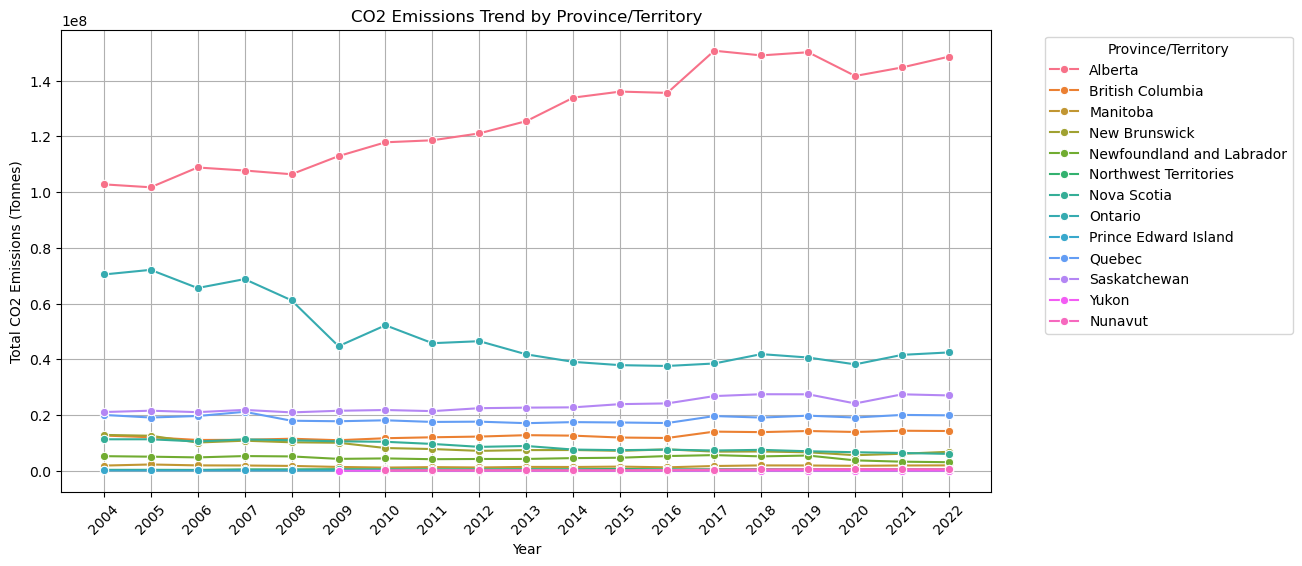

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='Year', y='CO2', hue='Province_Territory', marker='o')
plt.title('CO2 Emissions Trend by Province/Territory')
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (Tonnes)')
plt.legend(title='Province/Territory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=np.arange(min_year, max_year + 1, 1), rotation=45)
plt.grid(True)
plt.show()

\newpage

(7) Provide a description of the CO2 emission trend across provinces and territories based on the plot in (6).

The plot reveals that CO2 emissions vary considerably across provinces and territories over time. Some regions show a steady increase in emissions, while others display fluctuations—likely reflecting differences in industrial activity and reporting practices.

\newpage

(8) Develop a Shiny app that allows the user to input a start year (from 2004 to 2022), an end year (from 2004 to 2022), and select a gas type (CO2, CH4, N2O).
    - Use `ui.input_select` to allow the user to specify the start year (between 2004 and 2022).
    - Use `ui.input_select` to allow the user to specify the end year (between 2004 and 2022).
    - Use `ui.input_select` to allow the user to select the gas type (CO2, CH4, or N2O).

You can start by using the following Shiny app template to structure your app. When writing the app in `app.py`, remove the template instructions and replace them with your implementation.

You will also need to copy-paste your `app.py` in your assignment answers, similar to the template provided here:

In [28]:
# Shiny App Development using Python's Shiny framework
from shiny import App, render, ui

app_ui = ui.page_fluid(
    ui.input_select(
        id='emissiontype',
        label='Choose emission type',
        choices=['CO2', 'CH4', 'N2O'],
        selected='CO2'
    ),
    ui.input_select(
        "start_year",
        "Start Year",
        [str(year) for year in range(2004, 2023)]
    ),
    ui.input_select(
        "end_year",
        "End Year",
        [str(year) for year in range(2004, 2023)]
    ),
    ui.output_plot('myplot')
)

def server(input, output, session):
    @output
    @render.plot
    def myplot():
        # Read the pre-processed GHG data
        df = pd.read_csv("https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/cleaned_GHG_Emissions.csv", encoding='latin1')
        # Format the 'Year' column
        df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year
        # Filter data based on user-selected start and end years
        start_year = int(input.start_year())
        end_year = int(input.end_year())
        df_filtered = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
        # Group data by Year and Province/Territory, summing emissions for each gas type
        df_grouped = df_filtered.groupby(['Year', 'Province_Territory']).agg(
            CO2=('CO2', 'sum'),
            CH4=('CH4', 'sum'),
            N2O=('N2O', 'sum')
        ).reset_index()
        # Determine the emission type to plot
        emission_type = input.emissiontype()
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=df_grouped, x='Year', y=emission_type, hue='Province_Territory', marker='o')
        plt.title(f'{emission_type} Emissions Trend')
        plt.xlabel('Year')
        plt.ylabel(f'Total {emission_type} Emissions (Tonnes)')
        plt.legend(title='Province/Territory', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(ticks=np.arange(df_grouped['Year'].min(), df_grouped['Year'].max() + 1, 1), rotation=45)
        plt.grid(True)
        return plt.gcf()

app = App(app_ui, server)

ModuleNotFoundError: No module named 'shiny'

\newpage

(9) Deploy your Shiny App at [https://www.shinyapps.io/](https://www.shinyapps.io/). Then, provide the link to the App.

For example, the link to my app is [https://pratheepaj.shinyapps.io/my_app/](https://pratheepaj.shinyapps.io/my_app/).

[The link to my app](https://neerat.shinyapps.io/my_app/)

(I used Github Copilot for assistance)